# Lineal Models

https://colab.research.google.com/github/bmalcover/cursSocib/blob/main/1_ML/Linear_Regression.ipynb

## Lineal Regression

> In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the outcome or response variable, or a label in machine learning parlance) and one or more error-free independent variables (often called regressors, predictors, covariates, explanatory variables or features). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.  [Link](https://en.wikipedia.org/wiki/Regression_analysis)


The linear regression model is a simple yet powerful technique for regression problems, aiming to find the linear relationship between a dependent variable and one or more independent variables. This model assumes that there is a direct connection between the variables, expressed as a straight line in the case of one independent variable (simple linear regression), or as a hyperplane in higher-dimensional spaces (multiple linear regression).

Its main function is to approximate the data using a linear function, minimizing the sum of squared errors between the model’s predictions and the actual observed values. This is done, as you’ve seen in theory, using the least squares method, which adjusts the coefficients of the line to best fit the data points.

$$\hat{y}=w_{0} + w_{1}x_1$$

Where $w_{0}$ is the bias or intercept, and $w_1$ is the coefficient of the independent variable.

## Exercise 1

Now, that we understand the linear regression concept, let's implement the manual computation of the model. 

![process](../assets/bloc1/linear_regression.png)

In this exercise, we need to compute:
$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$

To do this using Python, we need to import the following libraries: 

In [161]:
import numpy as np
import matplotlib.pyplot as plt

- Numpy: To work with vectors and matrices. 
- Matplotlib: To visualize the data and the linear regression.

## 1. The data

For this exercise, we are going to work with this small set of samples: 
|  Sample |  x  |  y  |
|--------:|:---:|:---:|
|    1    |  1  |  3  |
|    2    |  2  |  5  |
|    3    |  3  |  7  |
|    4    |  4  |  9  |
|    5    |  5  | 11  |

As you can see, there is a clear relationship between the two variables:
Whenever x increases by 1, y increases by 2. There is a lineal relation. 

Here, we can see the arrays containing the data from the independent variable x and the dependent variable y:

In [162]:
X_data = np.array([[1], [2], [3], [4], [5]])
y_data = np.array([3, 5, 7, 9, 11])

It is important to visualize the data and see how they are distributed: 

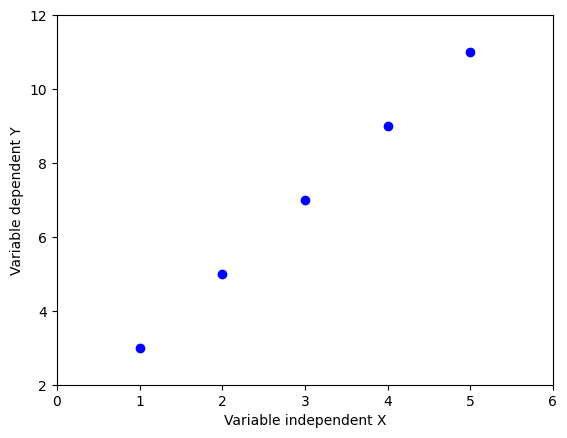

In [163]:
plt.scatter(X_data, y_data, color="blue")
plt.xlabel("Variable independent X")
plt.ylabel("Variable dependent Y")
plt.xlim(X_data.min() - 1, X_data.max() + 1)
plt.ylim(y_data.min() - 1, y_data.max() + 1)
plt.show()

In this part you will compute manually $\boldsymbol{\beta} = (X^T X)^{-1} X^T y $.  The final objective is to obtain $w_{0}$ (intercept) and $w_1$ that define the regression line and plot it: 
$$\hat{y}=w_{0} + w_{1}x_1$$



`Hint: Don’t forget to include the bias (intercept term)!`

- To compute the transpose of a matrix, use the `.T` attribute of the matrix. 
- To compute the inverse of a matrix, use the NumPy function `np.linalg.inv(...)`
- To multiply matrices, use the `@` operator.

In [ ]:
X = ...
y = ...

In [ ]:
# To Do: Compute the bias in this cell

Now, compute the lineal regression: 

In [ ]:
y_line = ...

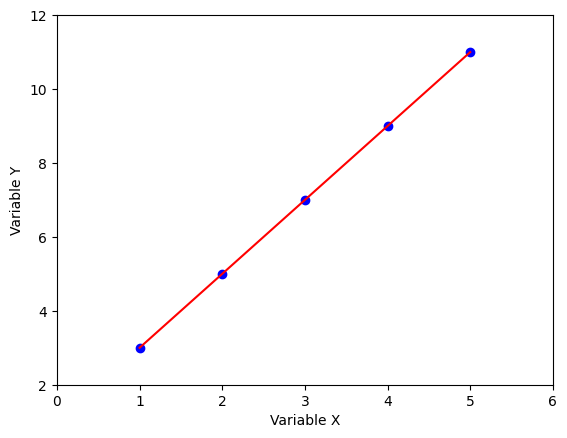

In [ ]:
plt.scatter(X_data, y_data, color="blue")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.xlim(X_data.min() - 1, X_data.max() + 1)
plt.ylim(y_data.min() - 1, y_data.max() + 1)
plt.plot(X_data, y_line, color="red", label="Línea de regresión")
plt.show()

## Exercise 2

Not all datasets are as neat and perfect as the small example we saw before. In real life, data can be bigger, noisier, and less “clean”, so the points won’t fit perfectly on a line.

In this exercise, we will use a larger dataset generated with some randomness (noise) to simulate real-world data.

We will use `scikit-learn` library, to fit a linear regression model easily and efficiently. Initially, we import the library: 

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Next, we create the dataset:

In [169]:
X, y = make_regression(
    n_samples=400, n_features=1, n_informative=1, noise=50.0, random_state=42
)

As before, we visualize the data:

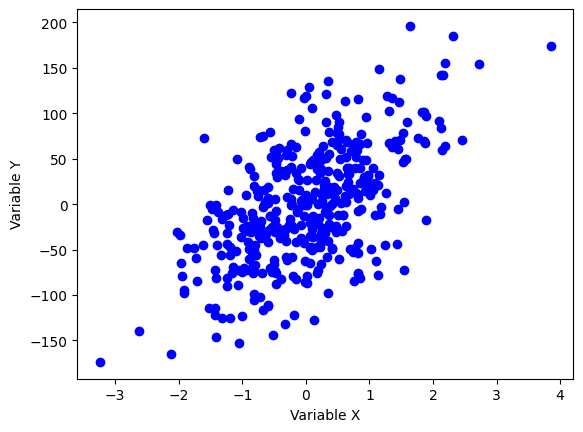

In [170]:
plt.scatter(X, y, color="blue")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()

In machine learning, we always follow these steps: 
1. Data processing. 
2. Training. 
3. Results analysis. 

Later in the course, we will cover how to preprocess and clean the data. For now, no preprocessing is needed.

Before training the model, it’s important to split the dataset into two parts:

- Training set: Used to train (fit) the linear regression model.
- Test set: Used to evaluate and validate how well the model performs on unseen data.

This division helps ensure that the model generalizes well and doesn’t just memorize the training data.

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

Let's create an object from `LinearRegression` class. The parameter `fit_interecpt = True` indicates that we want to compute automatically the intercept or bias: 

In [172]:
regr = LinearRegression(fit_intercept=True)

a) Fit the model: 

`Hint`: [LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


b) Print $w_{0}$ and $w_1$:

c) Use the method predict to obtain the results for the points and compare it with the manual computation using $w_{0}$ and $w_1$:

In [ ]:
points = np.array([[1], [2]])

d) Now, predict using the test set and visualize it: 

In [ ]:
y_pred = ...

In [ ]:
plt.scatter(X_test, y_test, c="black", label="Dades")
plt.plot(X_test, y_pred, c="blue", label="Regressió")
for x_t, y_t, y_p in zip(X_test, y_test, y_pred):
    plt.plot([x_t, x_t], [y_t, y_p], c="red", linestyle="--") 
plt.legend();

# Exercise 3

Regression problems also have metrics that indicate the quality of our predictions. We will use two different metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE).
$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

$ MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$




In [ ]:
mean_absolute_error()

In [ ]:
mean_squared_error()

In [ ]:
import math
math.sqrt(mean_squared_error())